# 19 固体杨氏模量讲义2025
## 初始化部分（不用阅读 直接跳过）

In [30]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import os
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 用黑体显示中文
def toMarkdown(x,e): # 将数字转换为Markdown格式的科学计数法 精度格式为e
    s=format(x,e)
    l=s.split('e')
    l[1]=str(int(l[1]))
    if(l[1]== '0'):
        return l[0]
    return l[0]+'\\times10^{'+l[1]+'}'

accuracy=".2e"

## 输入部分 并进行基础处理

请将你的数据放在同目录下的'data.txt'文件中，格式如下：

第一行有三个数，分别为金属丝的长度$L(cm)$，平面镜和直尺之间的距离$D(cm)$和光杠杆的臂长$l(cm)$

第二行有一个整数$n$，表示测量直径时测量的次数

第三行有$n$个数，表示测量的直径$d_i(mm)$

第四行有一个整数$m$，表示测量拉力时测量的次数

第五行和第六行有$m$个数，表示重量增加$ikg$时的读数$x_i(mm)$

```
80.65 152.22 7.49
6
0.603 0.601 0.597 0.601 0.603 0.606
8
1.50 2.19 3.10 3.78 4.45 5.09 5.76 6.41
1.85 2.59 3.29 3.91 4.56 5.19 5.79 6.41

```
输出部分 输入的内容将被读取并显示在屏幕上，并进行基础处理。

In [31]:
f=open('data.txt', 'r')
lines=f.readline().split()
L=float(lines[0])
D=float(lines[1])
l=float(lines[2])
lines=f.readline()
n=int(lines)
lines=f.readline().split()
d=[float(i) for i in lines]
lines=f.readline()
m=int(lines)
lines=f.readline().split()
x_1=[float(i) for i in lines]
lines=f.readline().split()
x_2=[float(i) for i in lines]
f.close()
x=[(x_1[i]+x_2[i])/2 for i in range(m)]
d_bar=np.mean(d)
print('L =', format(L,".3f"), 'cm')
print('l =', format(l,".3f"), 'cm')
print('D =', format(D,".3f"), 'cm')
print('d=', [format(i,".3f") for i in d], 'mm')
print('d_bar=', format(d_bar,".3f"), 'mm')
print('x_1=', [format(i,".2f") for i in x_1], 'mm')
print('x_2=', [format(i,".2f") for i in x_2], 'mm')
print('x=', [format(i,".2f") for i in x], 'mm')
print()
print("Markdown格式输出：")
print('|$id$|$'+'$|$'.join([str(i+1) for i in range(n)])+'$|')
print('|:---:' * (n + 1) + '|')
print('|$d$|$'+'$|$'.join([format(i,".3f") for i in d])+'$|')
print()
print('|$id$|$'+'$|$'.join([str(i+1) for i in range(m)])+'$|')
print('|:---:' * (m + 1) + '|')
print('|$x_1$|$'+'$|$'.join([format(i,".2f") for i in x_1])+'$|')
print('|$x_2$|$'+'$|$'.join([format(i,".2f") for i in x_2])+'$|')
print('|$\\bar x$|$'+'$|$'.join([format(i,".2f") for i in x])+'$|')

L = 80.650 cm
l = 7.490 cm
D = 152.220 cm
d= ['0.603', '0.601', '0.597', '0.601', '0.603', '0.606'] mm
d_bar= 0.602 mm
x_1= ['1.50', '2.19', '3.10', '3.78', '4.45', '5.09', '5.76', '6.41'] mm
x_2= ['1.85', '2.59', '3.29', '3.91', '4.56', '5.19', '5.79', '6.41'] mm
x= ['1.68', '2.39', '3.20', '3.84', '4.50', '5.14', '5.78', '6.41'] mm

Markdown格式输出：
|$id$|$1$|$2$|$3$|$4$|$5$|$6$|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$d$|$0.603$|$0.601$|$0.597$|$0.601$|$0.603$|$0.606$|

|$id$|$1$|$2$|$3$|$4$|$5$|$6$|$7$|$8$|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$x_1$|$1.50$|$2.19$|$3.10$|$3.78$|$4.45$|$5.09$|$5.76$|$6.41$|
|$x_2$|$1.85$|$2.59$|$3.29$|$3.91$|$4.56$|$5.19$|$5.79$|$6.41$|
|$\bar x$|$1.68$|$2.39$|$3.20$|$3.84$|$4.50$|$5.14$|$5.78$|$6.41$|


## 逐差法
相关公式
$$\bar{\Delta b}={1\over 16}\sum \limits_{i=1}^{4}(\bar r_{i+4}-\bar r_i)$$
$$E=\frac{2DLF}{Slb}=\frac{8mgLD}{\pi \Delta b d^2 l}$$
$$\frac{\Delta E}{E}=\sqrt{(\frac{\Delta D}{D})^2+
(\frac{\Delta L}{L})^2+
(\frac{\Delta l}{l})^2+
(\frac{\Delta F}{F})^2+
(\frac{\Delta b}{b})^2+
(\frac{2\Delta d}{d})^2}$$
需要的常数：
$∆m=5g,∆L = 0.05mm,∆D =0.05mm,∆l = 0.05mm,∆b = 0.05mm,∆d = 0.001mm$

```
(Markdown)
$$\bar{\Delta b}={1\over 16}\sum \limits_{i=1}^{4}(\bar r_{i+4}-\bar r_i)$$
$$E=\frac{2DLF}{Slb}=\frac{8mgLD}{\pi \Delta b d^2 l}$$
$$\frac{\Delta E}{E}=\sqrt{(\frac{\Delta D}{D})^2+(\frac{\Delta L}{L})^2+
(\frac{\Delta l}{l})^2+(\frac{\Delta F}{F})^2+
(\frac{\Delta b}{b})^2+(\frac{2\Delta d}{d})^2}$$
$∆m=5g,∆L = 0.05mm,∆D =0.05mm,∆l = 0.05mm,∆b = 0.05mm,∆d = 0.001mm$
```

In [32]:
deltam=5e-3
deltaL=5e-2/1000
deltaD=5e-2/1000
deltal=5e-2/1000
deltab=5e-2/1000
deltad=1e-3/1000
g=9.7887
m=1.0
#输入的数据单位换算成m
L/=100
l/=100
D/=100
d=[i/1000 for i in d]
d_bar/=1000
x=[i/100 for i in x]
b=0
for i in range(0,len(x)-4):
    b+=(x[i+4]-x[i])/16
E=(8*m*g*L*D)/(math.pi*b*d_bar*d_bar*l)
k=((deltaD/D)**2+(deltaL/L)**2+(deltal/l)**2+(deltam/m)**2+(deltab/b)**2+(2*deltad/d_bar)**2)**0.5

print("普通格式输出：")
print("b=",format(b*1000,'.4f'),"mm")
print("k=",format(k,'.4f'))
print("E=",format(E,'.4e'),"N/m^2")
print("deltaE=",format(E*k,'.4e'),"N/m^2")
print()
print("Markdown格式输出：")
print(f"E=\\frac{{8mgLD}}{{\\pi \\Delta b d^2 l}}=\\frac{{8\\times{toMarkdown(m,accuracy)}\\times{toMarkdown(g,".4e")}\\times{toMarkdown(L,accuracy)}\\times{toMarkdown(D,accuracy)}}}{{\\pi \\times {toMarkdown(b,accuracy)} \\times ({toMarkdown(d_bar,accuracy)})^2 \\times {toMarkdown(l,accuracy)}}}={toMarkdown(E,accuracy)} N/m^2")
print("deltaE=",toMarkdown(E*k,accuracy))


普通格式输出：
b= 6.7031 mm
k= 0.0096
E= 1.6828e+11 N/m^2
deltaE= 1.6152e+09 N/m^2

Markdown格式输出：
E=\frac{8mgLD}{\pi \Delta b d^2 l}=\frac{8\times1.00\times9.7887\times8.07\times10^{-1}\times1.52}{\pi \times 6.70\times10^{-3} \times (6.02\times10^{-4})^2 \times 7.49\times10^{-2}}=1.68\times10^{11} N/m^2
deltaE= 1.62\times10^{9}


## 作图法 （实验应该不作要求）

1.0866    0.6734


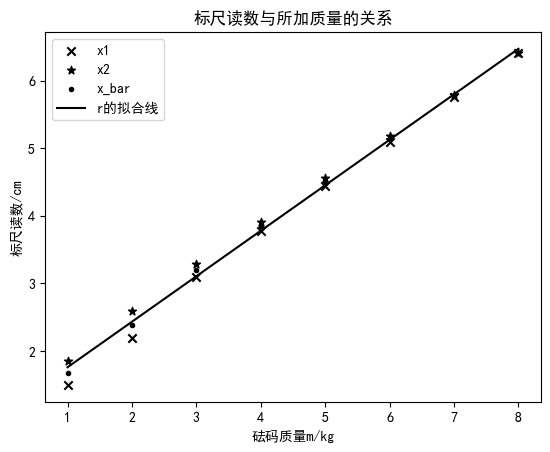

普通格式输出：
b= 6.7339 mm
k= 0.0096
E= 1.6751e+11 N/m^2
deltaE= 1.6034e+09 N/m^2

Markdown格式输出：
E= 1.68\times10^{11}
deltaE= 1.60\times10^{9}


In [ ]:
beta,apha= np.polyfit(range(1,len(x)+1),[i*100 for i in x], 1)
print(format(apha,'.4f'),'  ',format(beta,'.4f'))

plt.scatter(range(1,len(x)+1),[i for i in x_1],label='x1',color='black',marker="x")
plt.scatter(range(1,len(x)+1),[i for i in x_2],label='x2',color='black',marker='*')
plt.scatter(range(1,len(x)+1),[i*100 for i in x],label='x_bar',color='black',marker='.')
plt.plot(range(1,len(x)+1),[apha+beta*i for i in range(1,len(x)+1)], color='black', label='r的拟合线')
plt.legend()
plt.xlabel('砝码质量m/kg')
plt.ylabel('标尺读数/cm')
plt.title('标尺读数与所加质量的关系')
plt.show()

b=beta/100
E=(8*m*g*L*D)/(math.pi*b*d_bar*d_bar*l)
k=((deltaD/D)**2+(deltaL/L)**2+(deltal/l)**2+(deltam/m)**2+(deltab/b)**2+(2*deltad/d_bar)**2)**0.5

print("普通格式输出：")
print("b=",format(b*1000,'.4f'),"mm")
print("k=",format(k,'.4f'))
print("E=",format(E,'.4e'),"N/m^2")
print("deltaE=",format(E*k,'.4e'),"N/m^2")
print()
print("Markdown格式输出：")
print(f"E=\\frac{{8mgLD}}{{\\pi \\Delta b d^2 l}}=\\frac{{8\\times{toMarkdown(m,accuracy)}\\times{toMarkdown(g,".4e")}\\times{toMarkdown(L,accuracy)}\\times{toMarkdown(D,accuracy)}}}{{\\pi \\times {toMarkdown(b,accuracy)} \\times ({toMarkdown(d_bar,accuracy)})^2 \\times {toMarkdown(l,accuracy)}}}={toMarkdown(E,accuracy)} N/m^2")
print("deltaE=",toMarkdown(E*k,accuracy))